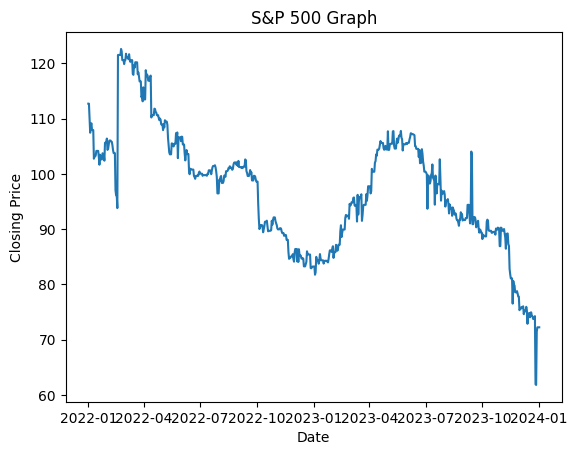

In [16]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv("sandp500.csv")

ds['Date'] = pd.to_datetime(ds['Date'])
ds = ds.sort_values(by = 'Date')
plt.plot(ds['Date'], ds['Close'])

plt.title("S&P 500 Graph")
plt.xlabel("Date")
plt.ylabel("Closing Price")

plt.show()


